In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dato il nome di una regione (inserito dall'utente), calcolare la dimensione media della superficie delle sue province. Visualizzare poi sulla mappa la regione e le province, facendo in modo che le province con una superficie inferiore alla media siano colorate di verde mentre le altre siano colorate di rosso. Visualizzare anche i nomi delle province. Controllare che il nome della regione sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [ ]:
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/Reg01012021_g')

In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/ProvCM01012021_g')

In [ ]:
# regione = input('Inserire il nome di una regione: ')
# regione1 = regioni[regioni['DEN_REG']==regione].geometry.squeeze()

# if regioni[regioni.contains(regione)]:
  # regione_squeeze = regioni.loc['NIL']='regione', 'geometry'.squeeze()
  # prov_reg = province[province.within(regione_squeeze)]
  # media = prov_reg[prov_reg['Shape_leng'].mean()]
  # prov_min = prov_reg[prov_reg['Shape_leng']<media]
  # prov_mag = prov_reg[prov_reg['Shape_Leng']>media]
# else:
  # print('Regione non presente nel dataset')

In [38]:
import matplotlib.pyplot as plt

In [40]:
input_reg = input('Inserire il nome di una regione: ')

if input_reg in list(regioni.DEN_REG):
  regione = regioni[regioni['DEN_REG'] == input_reg]
  prov_reg = province[province.within(regione.geometry.squeeze())]
  media = prov_reg.Shape_Area.mean()
  prov_sup = prov_reg[prov_reg.Shape_Area >= media]
  prov_inf = prov_reg[prov_reg.Shape_Area < media]

  prov_reg3857 = prov_reg.to_crs(epsg = 3857)
  prov_reg3857["coords"] = prov_reg3857["geometry"].apply(lambda x: x.representative_point().coords[:])
  prov_reg3857["coords"] = [coords[0] for coords in prov_reg3857["coords"]]

  ax = regione.to_crs(epsg=3857).plot(figsize =(20, 20), facecolor="none", edgecolor="k")
  prov_sup.to_crs(epsg=3857).plot(ax=ax, facecolor="red", alpha=0.5, edgecolor="k")
  prov_inf.to_crs(epsg=3857).plot(ax=ax, facecolor="green", alpha=0.5, edgecolor="k")
  contextily.add_basemap(ax=ax)

  for idx, row in prov_reg3857.iterrows():
    plt.annotate(s=row["DEN_UTS"], xy=row["coords"], horizontalalignment="center", color="k")
else:
  print('Regione non presente nel dataset')

Output hidden; open in https://colab.research.google.com to view.

Cercare la provincia che ha la superficie maggiore. Visualizzare poi su una mappa la provincia con la superficie maggiore e tutte le province con cui confina. Colorare di verde la provincia più estesa e di giallo le province confinanti.

In [ ]:
prov_sup_mag = province['Shape_Area'].max()
prov_sup_mag

7693245180.2

In [ ]:
prov = province[province['Shape_Area']==prov_sup_mag]
prov

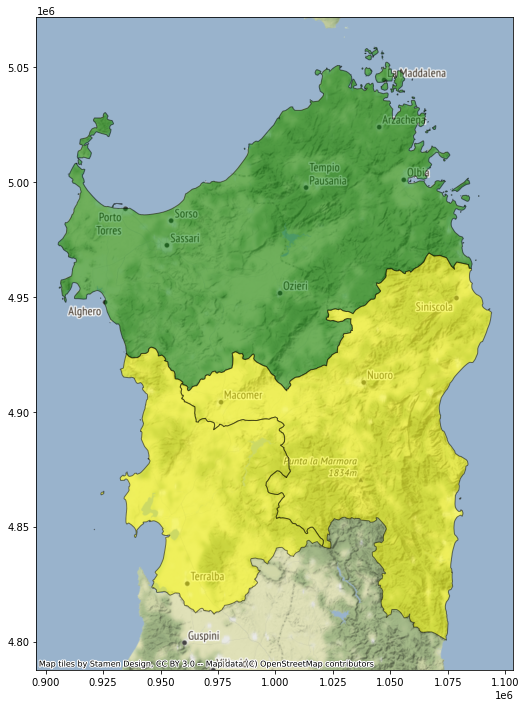

In [ ]:
ax = prov.to_crs(epsg=3857).plot(figsize=(10, 12), facecolor='green', edgecolor='k', alpha=0.5)
province[province.touches(prov.geometry.squeeze())].to_crs(epsg=3857).plot(ax=ax, facecolor='yellow', edgecolor='k', alpha=0.5)
contextily.add_basemap(ax=ax)

Estrarre dalle province le province lombarde. Utilizzare poi il dataset così ottenuto per visualizzare le province attraversate da un corso d'acqua inserito dall'utente. Visualizzare infine le province e il corso d'acqua su una mappa. Controllare che il nome del corso d'acqua sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [ ]:
corsi_acqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Corsi_acqua_Piano_di_Gestione.zip')

In [ ]:
# lombardia = regioni.loc[regioni['DEN_REG']='Lombardia', 'geometry'.squeeze()]

In [ ]:
lombardia = regioni[regioni['DEN_REG']=='Lombardia']
# lombardia = regioni.loc[regioni.DEN_REG=='Lombardia']

In [ ]:
prov_lomb = province[province.within(lombardia.geometry.squeeze())]
prov_lomb

Inserire un corso d'acqua: Lambro (Fiume)


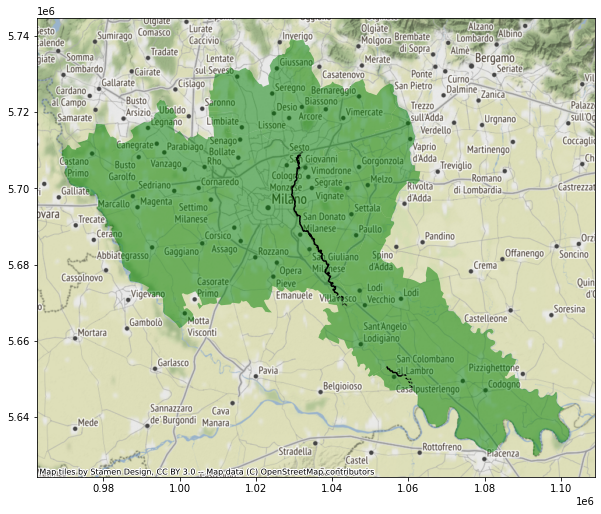

In [ ]:
input_corso = input("Inserire un corso d'acqua: ")

if input_corso in list(corsi_acqua.NOME):
  corso_acqua = corsi_acqua[corsi_acqua['NOME']==input_corso]
  prov_corso = prov_lomb[prov_lomb.intersects(corso_acqua.unary_union)]
  ax = corso_acqua.to_crs(epsg=3857).plot(figsize=(10, 10), color='k')
  prov_corso.to_crs(epsg=3857).plot(ax=ax, facecolor='green', alpha=0.5, linewidth=4)
  contextily.add_basemap(ax=ax)
else:
  print("Corso d'acqua non presente nel dataset")